In [16]:
import sqlite3
import pandas as pd

# Connect to SQLite
conn = sqlite3.connect("../db/seattle_airbnb.db")

# Load the listings table
df = pd.read_sql("SELECT * FROM listings", conn)

print(df.shape)
df.head()

(3818, 92)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,None,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,None,...,10.0,f,None,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,None,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,None,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,None,A charming apartment that sits atop Queen Anne...,none,None,...,NaN,f,None,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,None,WASHINGTON,f,strict,f,f,1,0.89


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [18]:
# Show only columns with missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

license                        3818
square_feet                    3721
monthly_price                  2301
security_deposit               1952
weekly_price                   1809
notes                          1606
neighborhood_overview          1032
cleaning_fee                   1030
transit                         934
host_about                      859
host_acceptance_rate            773
review_scores_accuracy          658
review_scores_checkin           658
review_scores_value             656
review_scores_location          655
review_scores_cleanliness       653
review_scores_communication     651
review_scores_rating            647
reviews_per_month               627
last_review                     627
first_review                    627
space                           569
host_response_time              523
host_response_rate              523
neighbourhood                   416
thumbnail_url                   320
medium_url                      320
xl_picture_url              

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\elias\AppData\Local\Temp\ipykernel_35820\747557034.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


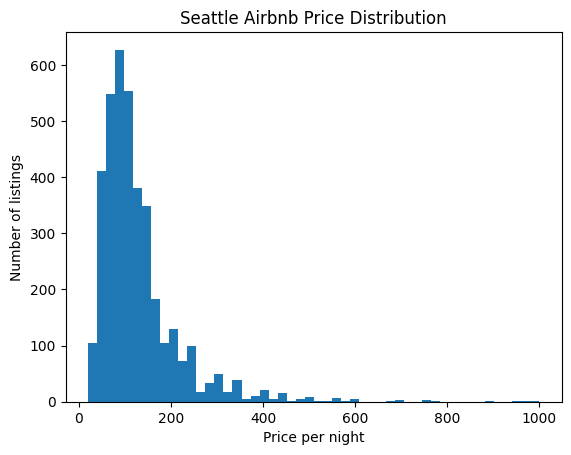

In [19]:
import matplotlib.pyplot as plt

df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

plt.hist(df['price'],bins=50)
plt.xlabel('Price per night')
plt.ylabel('Number of listings')
plt.title('Seattle Airbnb Price Distribution')
plt.show()

In [20]:
df['neighbourhood_cleansed'].value_counts().head(10)

neighbourhood_cleansed
Broadway                     397
Belltown                     234
Wallingford                  167
Fremont                      158
Minor                        135
University District          122
Stevens                      119
First Hill                   108
Central Business District    103
Lower Queen Anne              94
Name: count, dtype: int64

In [21]:
df.groupby("neighbourhood_cleansed")['price'].mean().sort_values(ascending=False).head(10)

neighbourhood_cleansed
Southeast Magnolia     231.705882
Portage Bay            227.857143
Westlake               194.470588
West Queen Anne        187.769231
Montlake               182.789474
Briarcliff             176.571429
Sunset Hill            176.055556
Industrial District    173.333333
Alki                   171.619048
Windermere             169.900000
Name: price, dtype: float64

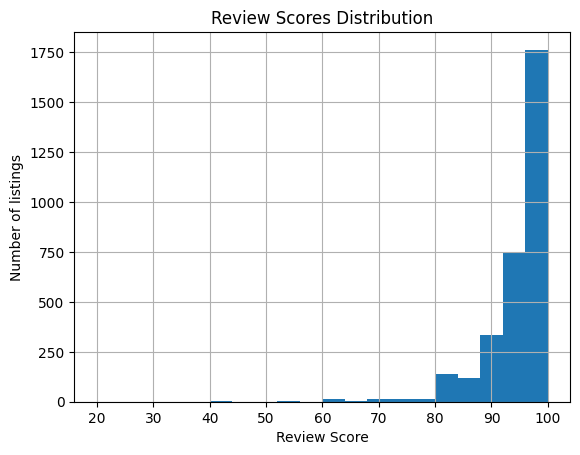

In [22]:
df['review_scores_rating'].hist(bins=20)
plt.xlabel("Review Score")
plt.ylabel("Number of listings")
plt.title("Review Scores Distribution")
plt.show()


In [23]:
# drop sparse columns
cols_to_drop = [
    "license", "square_feet", "notes", 
    "monthly_price", "weekly_price", 
    "security_deposit", "neighborhood_overview",
    "thumbnail_url", "medium_url", "xl_picture_url",
    "neighbourhood"  # redundant with neighbourhood_cleansed
]
df = df.drop(columns=cols_to_drop, errors="ignore")

In [24]:
# cleaning_fee
df['cleaning_fee'] = (
    df['cleaning_fee']
    .replace('[\$,]', '', regex=True)
    .astype(float)
    .fillna(0)
)

<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
C:\Users\elias\AppData\Local\Temp\ipykernel_35820\2332433356.py:4: SyntaxWarning: invalid escape sequence '\$'
  .replace('[\$,]', '', regex=True)


In [25]:
# bedrooms, bathrooms, beds - median impute
for col in ['bedrooms', 'bathrooms', 'beds']:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

In [26]:
# zipcode - mode
mode_zip = df['zipcode'].mode()[0]
df['zipcode'] = df['zipcode'].fillna(mode_zip)

# reviews_per_month
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [27]:
# host_acceptance_rate - median
if 'host_acceptance_rate' in df.columns:
    # remove % sign
    df['host_acceptance_rate'] = (
        df['host_acceptance_rate']
        .str.replace('%','')
        .astype(float)
        .fillna(df['host_acceptance_rate'].str.replace('%','').astype(float).median())
    )

# host_response_rate - median
if 'host_response_rate' in df.columns:
    df['host_response_rate'] = (
        df['host_response_rate']
        .str.replace('%','')
        .astype(float)
        .fillna(df['host_response_rate'].str.replace('%','').astype(float).median())
    )

# host_response_time - mode
if 'host_response_time' in df.columns:
    mode_response_time = df['host_response_time'].mode()[0]
    df['host_response_time'] = df['host_response_time'].fillna(mode_response_time)


In [28]:
# property_type - mode
if 'property_type' in df.columns:
    mode_property = df['property_type'].mode()[0]
    df['property_type'] = df['property_type'].fillna(mode_property)

In [29]:
# text columns: fill with 'unknown'
text_fill = [
    "host_about", "transit", "summary", 
    "space", "host_name", "host_location", 
    "host_neighbourhood"
]
for col in text_fill:
    if col in df.columns:
        df[col] = df[col].fillna("unknown")


In [30]:
# review scores columns
review_cols = [
    col for col in df.columns if col.startswith("review_scores_")
]

# define a neutral review score
neutral_score = 80

for col in review_cols:
    # add missing indicator
    df[f"{col}_missing_flag"] = df[col].isnull().astype(int)
    
    # fill missing with neutral
    df[col] = df[col].fillna(neutral_score)

In [31]:
df[review_cols + [f"{c}_missing_flag" for c in review_cols]].head()


,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,review_scores_rating_missing_flag,review_scores_accuracy_missing_flag,review_scores_cleanliness_missing_flag,review_scores_checkin_missing_flag,review_scores_communication_missing_flag,review_scores_location_missing_flag,review_scores_value_missing_flag
0,95.0,10.0,10.0,10.0,10.0,9.0,10.0,0,0,0,0,0,0,0
1,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,0,0,0,0
2,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,0,0,0,0
3,80.0,80.0,80.0,80.0,80.0,80.0,80.0,1,1,1,1,1,1,1
4,92.0,9.0,9.0,10.0,10.0,9.0,9.0,0,0,0,0,0,0,0


In [32]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

first_review                 627
last_review                  627
host_since                     2
host_thumbnail_url             2
host_is_superhost              2
host_picture_url               2
host_listings_count            2
host_verifications             2
host_total_listings_count      2
host_identity_verified         2
host_has_profile_pic           2
dtype: int64


In [34]:
# optionally save
df.to_csv("../data/processed/listings_cleaned.csv", index=False)